# House Prices: Advanced Regression Techniques
## A mediumai approach.

Create symlink to fastai directory using `mklink /d fastai ..\..\fastai` in (administrator) command prompt (Windows 10). Subsequently, import required modules.

In [1]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

Read in training data using pandas.

In [2]:
PATH = "input/"

In [3]:
df_raw = pd.read_csv(f'{PATH}train.csv', low_memory=False)

Function from fastai lesson 1 which allows up to 1000 columns to be displayed. 

In [4]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [5]:
display_all(df_raw.tail().T)

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


Need to minimise the root mean squared logarithmic error. 

In [6]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

## Random Forest
Lets just try a random forest.

The categorical variables are currently stored as strings which doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` to convert strings to pandas categories.

In [7]:
train_cats(df_raw)

In [8]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

In [9]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/house_prices-raw')

Lets save 1/2 the data for validation (`n_valid = 730`).

In [10]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()
n_valid = 730
n_trn = len(df_raw)-n_valid # 730 for this competition.

In [11]:
#df_raw = pd.read_feather('tmp/house_prices-raw',1) Not working - some kind of pandas issue. 
import feather
df_raw = feather.read_dataframe('tmp/house_prices-raw')

Process raw categorical data and missing values. Potentially Exclude `Alley` and `MiscFeature`, due to the high proportion of `NaN` values.

In [12]:
df, y, nas = proc_df(df_raw, 'SalePrice',['Alley','MiscFeature'])

#df, y, nas = proc_df(df_raw, 'SalePrice')
#?proc_df

Split training and validation data.

In [13]:
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((730, 81), (730,), (730, 81))

In [14]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    print('##################################################')
    print('Results')
    print('log Root Mean Square Error Training Set: {:0.3}'.format(rmse(m.predict(X_train), y_train)))
    print('log Root Mean Square Error Validation Set: {:0.3}'.format(rmse(m.predict(X_valid), y_valid)))
    print('R^2 Training Set: {:0.3}'.format(m.score(X_train, y_train)))
    print('R^2 Validation Set: {:0.3}'.format(m.score(X_valid, y_valid)))
    if hasattr(m, 'oob_score_'): print('oob_score: {:0.3}'.format(m.oob_score_))
    print('##################################################')
    #if hasattr(m, 'oob_score_'): res.append(m.oob_score_)

In [15]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Tristan\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 113 ms
##################################################
Results
log Root Mean Square Error Training Set: 0.0717
log Root Mean Square Error Validation Set: 0.154
R^2 Training Set: 0.97
R^2 Validation Set: 0.837
##################################################


A naive score of around 0.15. This puts us at araund rank 2770 out of 4305, around the top 64th percentile (i.e. only better than 36% of participants - mediumai indeed). 

## Single Tree

In [42]:
m = RandomForestRegressor(n_estimators = 1, max_depth = 3, bootstrap = False, n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

##################################################
Results
log Root Mean Square Error Training Set: 0.215
log Root Mean Square Error Validation Set: 0.224
R^2 Training Set: 0.734
R^2 Validation Set: 0.655
##################################################


Install 'graphviz' from https://graphviz.gitlab.io/_pages/Download/Download_windows.html. Add `C:\Program Files (x86)\Graphviz2.38\bin` to User Path and `C:\Program Files (x86)\Graphviz2.38\bin\dot.exe` to System Path (windows 10).

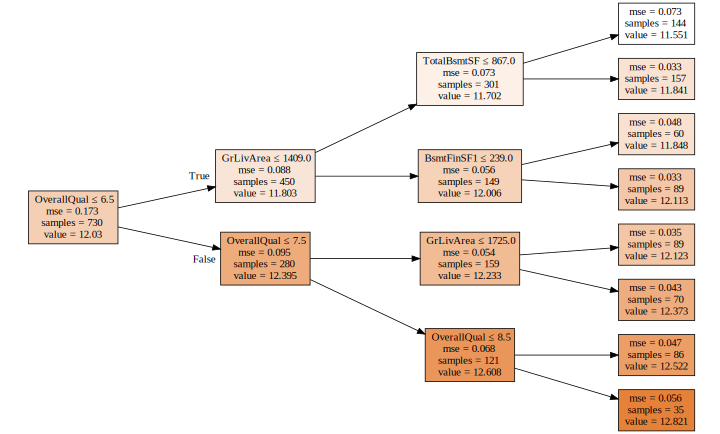

In [49]:
draw_tree(m.estimators_[0],X_train, precision=3)
?draw_tree

`OverallQual`Rates the overall material and finish of the house.  
`GrLivArea`   
`TotalBsmtSF`   
`BsmtFinSF1` 

   `OverallQual`:  
   10   Very Excellent  
   9    Excellent  
   8    Very Good  
   7    Good  
   6    Above Average  
   5    Average  
   4    Below Average  
   3    Fair  
   2    Poor  
   1    Very Poor  

In [19]:
np.exp(12.821)-np.exp(12.522)

95598.32374328456

In [20]:
np.exp(12.522)

274306.12328762707

In [52]:
m = RandomForestRegressor(n_estimators = 40, n_jobs=-1, oob_score=True)
%time  m.fit(X_train, y_train)
print_score(m)

Wall time: 122 ms
##################################################
Results
log Root Mean Square Error Training Set: 0.0631
log Root Mean Square Error Validation Set: 0.147
R^2 Training Set: 0.977
R^2 Validation Set: 0.852
oob_score: 0.839
##################################################


We'll grab the predictions for each individual tree, and look at one example.

In [22]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0] # Corresponding to first item in validation set.

(array([12.43321, 12.30138, 12.56024, 12.44509, 12.31043, 12.6885 , 12.61818, 12.53358, 12.56375, 12.6885 ,
        12.54254, 12.27022, 12.53358, 12.54254, 12.53358, 12.52453, 12.56375, 12.47801, 12.47801, 12.87902,
        12.52453, 12.56375, 12.56375, 12.52453, 12.56375, 12.56375, 12.53358, 12.25248, 12.30138, 12.56024,
        12.56375, 12.56375, 12.52088, 12.4541 , 12.56375, 12.52088, 12.56375, 12.56024, 12.67608, 12.56375]),
 12.524781933810214,
 12.373703486914124)

In [23]:
preds.shape

(40, 730)

Text(0.5, 0, 'n_estimators')

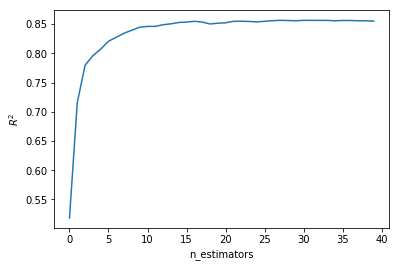

In [24]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(40)]);
plt.ylabel('$R^2$')
plt.xlabel('n_estimators')

Text(0.5, 0, 'n_estimators')

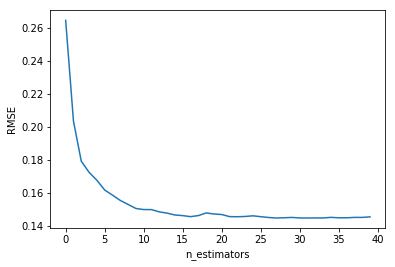

In [25]:
plt.plot([rmse(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(40)]);
plt.ylabel('RMSE')
plt.xlabel('n_estimators')

In [26]:
m = RandomForestRegressor(n_estimators = 40, max_features = 0.5, n_jobs=-1, oob_score=True)
%time  m.fit(X_train, y_train)
print_score(m)

Wall time: 121 ms
##################################################
Results
log Root Mean Square Error Training Set: 0.058
log Root Mean Square Error Validation Set: 0.143
R^2 Training Set: 0.981
R^2 Validation Set: 0.86
oob_score: 0.854
##################################################


Improvement using `max_features = 0.5`.

In [27]:
?RandomForestRegressor

In [28]:
max_features_vals = [0.001, 0.01, 0.1, 0.5, 1, 10, 15, 50, 70]
max_features_score = []
for i in max_features_vals:
    m = RandomForestRegressor(n_estimators = 40, max_features = i, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    max_features_score.append(m.score(X_valid, y_valid))


Text(0.5, 0, 'max_features')

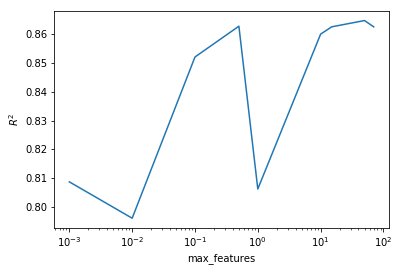

In [29]:
plt.semilogx(max_features_vals,max_features_score)
plt.ylabel('$R^2$')
plt.xlabel('max_features')

In [72]:
max_features_vals =np.linspace(0.1,1,100)
print(max_features_vals)

[0.1     0.10909 0.11818 0.12727 0.13636 0.14545 0.15455 0.16364 0.17273 0.18182 0.19091 0.2     0.20909
 0.21818 0.22727 0.23636 0.24545 0.25455 0.26364 0.27273 0.28182 0.29091 0.3     0.30909 0.31818 0.32727
 0.33636 0.34545 0.35455 0.36364 0.37273 0.38182 0.39091 0.4     0.40909 0.41818 0.42727 0.43636 0.44545
 0.45455 0.46364 0.47273 0.48182 0.49091 0.5     0.50909 0.51818 0.52727 0.53636 0.54545 0.55455 0.56364
 0.57273 0.58182 0.59091 0.6     0.60909 0.61818 0.62727 0.63636 0.64545 0.65455 0.66364 0.67273 0.68182
 0.69091 0.7     0.70909 0.71818 0.72727 0.73636 0.74545 0.75455 0.76364 0.77273 0.78182 0.79091 0.8
 0.80909 0.81818 0.82727 0.83636 0.84545 0.85455 0.86364 0.87273 0.88182 0.89091 0.9     0.90909 0.91818
 0.92727 0.93636 0.94545 0.95455 0.96364 0.97273 0.98182 0.99091 1.     ]


In [74]:
max_features_score = []
for i in max_features_vals:
    m = RandomForestRegressor(n_estimators = 40, max_features = i, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    max_features_score.append(m.score(X_valid, y_valid))

Text(0.5, 0, 'max_features')

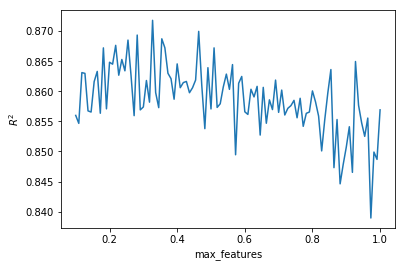

In [75]:
plt.plot(max_features_vals,max_features_score)
plt.ylabel('$R^2$')
plt.xlabel('max_features')

In [33]:
?RandomForestRegressor

In [79]:
m = RandomForestRegressor(n_estimators = 40, max_features = 0.45, n_jobs=-1, oob_score=True)
%time  m.fit(X_train, y_train)
print_score(m)

Wall time: 120 ms
##################################################
Results
log Root Mean Square Error Training Set: 0.0611
log Root Mean Square Error Validation Set: 0.141
R^2 Training Set: 0.978
R^2 Validation Set: 0.862
oob_score: 0.845
##################################################


In [94]:
fi = rf_feat_importance(m, df); fi [:10]

,cols,imp
16,OverallQual,0.316069
45,GrLivArea,0.186817
37,TotalBsmtSF,0.055789
18,YearBuilt,0.053899
26,ExterQual,0.038484
42,1stFlrSF,0.034401
61,GarageArea,0.032403
60,GarageCars,0.030300
33,BsmtFinSF1,0.016969
4,LotArea,0.014850


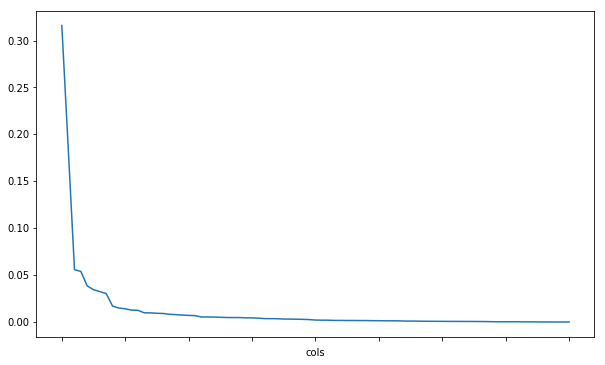

In [85]:
fi.plot('cols','imp', figsize=(10,6), legend = False)

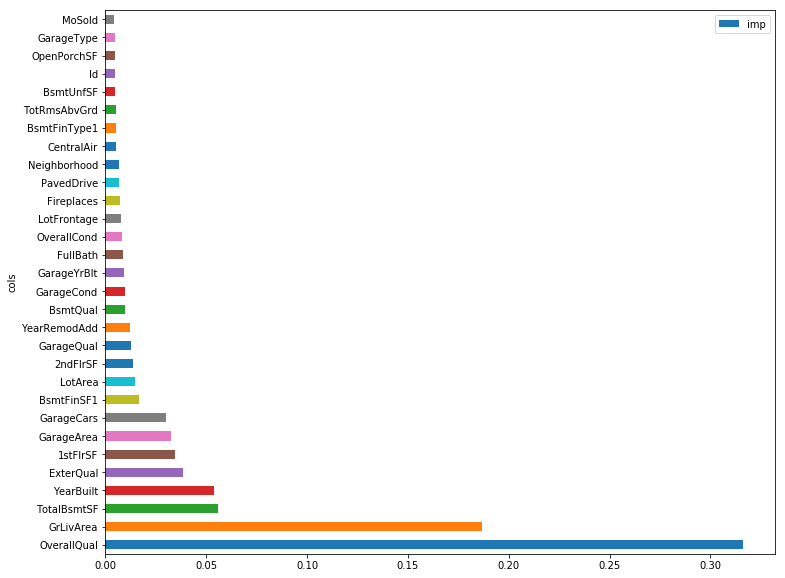

In [89]:
fi[:30].plot('cols', 'imp', 'barh', figsize = (12,10))

In [95]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

26

In [99]:
df_keep = df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [116]:
m = RandomForestRegressor(n_estimators = 40, max_features = 0.45, n_jobs=-1, oob_score=True)
%time  m.fit(X_train, y_train)
print_score(m)

Wall time: 119 ms
##################################################
Results
log Root Mean Square Error Training Set: 0.0596
log Root Mean Square Error Validation Set: 0.142
R^2 Training Set: 0.98
R^2 Validation Set: 0.861
oob_score: 0.847
##################################################


In [117]:
fi = rf_feat_importance(m, df_keep); fi [:10]

,cols,imp
0,OverallQual,0.285278
1,GrLivArea,0.162653
3,YearBuilt,0.095292
2,TotalBsmtSF,0.052480
7,GarageCars,0.045895
6,GarageArea,0.039596
4,ExterQual,0.037599
5,1stFlrSF,0.035432
16,FullBath,0.030769
15,GarageYrBlt,0.028524


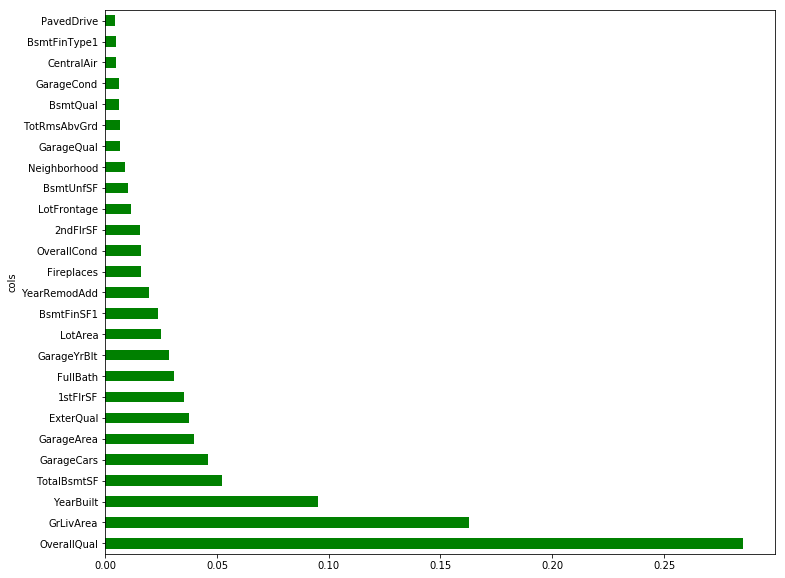

In [123]:
fi[:30].plot('cols', 'imp', 'barh', figsize = (12,10), legend = False, color='g')